In [9]:
#!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
dtype_dict = dict(zip(range(13, 14898), ['float32' for _ in range(13, 14898)]))
weather_df = pd.read_csv("transposed_daily_temperature_1000_cities_1980_2020.csv", low_memory=False,
                              dtype=dtype_dict)
weather_df.columns = weather_df.columns[:13].union(pd.to_datetime(weather_df.columns[13:]), sort=False)
weather_df.set_index("city", inplace=True)


In [11]:
def city_temperature(weather_df, city, start, end, freq):
    time_range = pd.date_range(start=start, end=end, freq=freq)
    weather_df = weather_df[time_range]
    return weather_df.loc[city]


In [31]:
#Suppose that we want to see the temperature of Terhan and Tokyo for 10 consecutive days since 1980
city_temperature(weather_df,["Tehran", "Tokyo"] ,'1/1/1980', '1/10/1980', 'D')

,1980-01-01 00:00:00,1980-01-02 00:00:00,1980-01-03 00:00:00,1980-01-04 00:00:00,1980-01-05 00:00:00,1980-01-06 00:00:00,1980-01-07 00:00:00,1980-01-08 00:00:00,1980-01-09 00:00:00,1980-01-10 00:00:00
city,,,,,,,,,,
Tehran,-4.54,-3.00,-1.02,-1.69,0.39,1.28,-3.05,-5.74,-6.62,-5.00
Tokyo,4.16,4.06,7.12,9.23,3.20,7.01,3.21,2.03,4.49,5.94


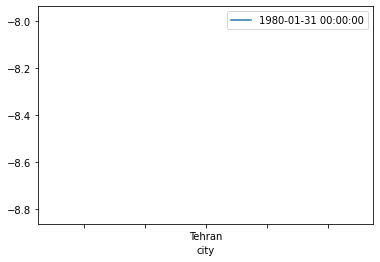

In [33]:
#We can also plot temperature  
ax=city_temperature(weather_df,["Tehran"] ,'1/1/1980','2/10/1980', 'M').plot()
#ax.set_xlabel("date")[]
#ax.set_ylabel("temperature (C)")
plt.show()